In [1]:
#! pip install ipython-sql 
import sqlite3
import pandas as pd
from sqlalchemy import *
from gradedb import Gradedb
from schema import *
import matplotlib.pyplot as plt

In [2]:
%load_ext sql
%sql sqlite:///gradedb.db
engine = create_engine("sqlite:///gradedb.db")

In [3]:
# joining the rows of all the tables from the left side starting with the students
Stud_summary = text('''
SELECT 
    stu.universityid,
    stu.name AS 'Student Name',
    stu.email AS 'Student Email',
    COUNT(tk.title) AS 'Number of Assignments',
    COUNT(ef.finishedid) AS 'Number of Graded Assignments',
    ROUND(AVG(sc.value),2) AS 'Score'
  FROM Student stu
  LEFT JOIN Assignment asg ON asg.universityid = stu.universityid
  LEfT JOIN Task tk ON tk.taskid = asg.taskid
  LEFT JOIN Submission sb ON sb.assignmentid = asg.assignmentid
  LEFT JOIN EvaluationRequest er ON er.submissionid = sb.submissionid
  LEFT JOIN Evaluation ev ON ev.requestid = er.requestid
  LEFT JOIN EvaluationFinished ef ON ef.evaluationid = ev.evaluationid
  LEFT JOIN Scores sc ON sc.evaluationid = ev.evaluationid
  GROUP BY stu.universityid''')

In [4]:
Stud_summ_df = pd.read_sql(Stud_summary, engine)        # create a pandas data frame with the student summary
Stud_summ_df

,universityid,Student Name,Student Email,Number of Assignments,Number of Graded Assignments,Score
0,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,3,3,7.00
1,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,3,3,2.67
2,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,3,2,8.00
3,S2204697,Diana Brown,s2204697@vuw.leidenuniv.nl,3,0,NaN
4,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,3,3,3.00


In [5]:
#function for student summary for separate student 
def studentsSummaryDF(StudentUniID):
    stud_summary = (Stud_summ_df[Stud_summ_df['universityid']== StudentUniID])                  # filter for specific student
    plt.hist(Stud_summ_df['Score'], alpha=0.2,bins=20,color = "grey", label='Overall scores')   # create histogram with all received grades
    plt.hist(stud_summary['Score'], alpha=0.5,bins=20,color = "orange", label='Your score(s)')  # create histogram with only student his/her grade
    plt.title('Received grades')    
    plt.ylabel('Amount of people who received this grade')
    plt.xlabel('Grade')
    plt.xlim(0, 10)
    plt.legend()
    plt.show()
    return(stud_summary)

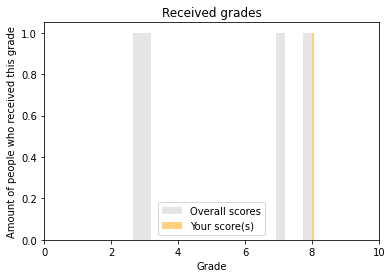

,universityid,Student Name,Student Email,Number of Assignments,Number of Graded Assignments,Score
2,S1961057,Dominic Robinson,s1961057@vuw.leidenuniv.nl,3,2,8.0


In [6]:
# the result when using the function
studentsSummaryDF('S1961057')


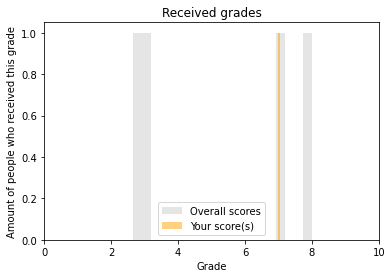

,universityid,Student Name,Student Email,Number of Assignments,Number of Graded Assignments,Score
0,S0225853,James Morse,s0225853@vuw.leidenuniv.nl,3,3,7.0


In [7]:
studentsSummaryDF('S0225853')

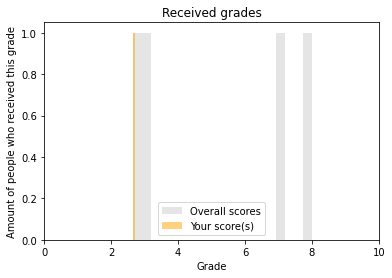

,universityid,Student Name,Student Email,Number of Assignments,Number of Graded Assignments,Score
1,S0416410,Marjorie Steele,s0416410@vuw.leidenuniv.nl,3,3,2.67


In [8]:
studentsSummaryDF('S0416410')

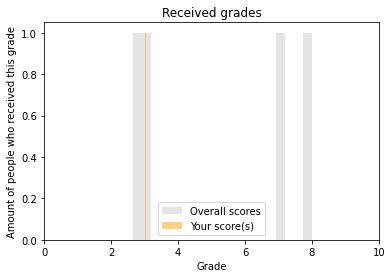

,universityid,Student Name,Student Email,Number of Assignments,Number of Graded Assignments,Score
4,S4587398,Mary Bakley,s4587398@vuw.leidenuniv.nl,3,3,3.0


In [10]:
studentsSummaryDF('S4587398')